In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='Height', ylabel='Count'>

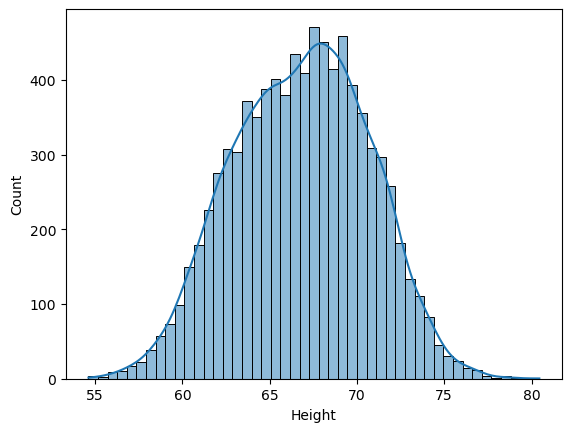

In [4]:
sns.histplot(df['Height'], kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

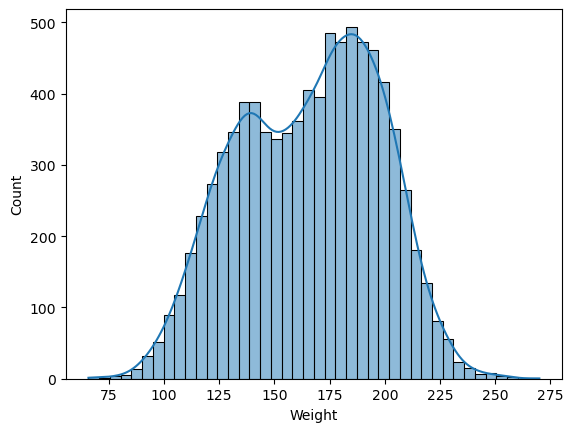

In [5]:
sns.histplot(df['Weight'], kde=True)

# Descriptive Stats

In [6]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
df.Height.mean()

66.80992512908925

In [8]:
df.Height.median()

66.98592338

In [9]:
df.Height.mode() #categorical

0       54.616858
1       54.873728
2       55.148557
3       55.336492
4       55.668202
          ...    
8550    78.462053
8551    78.528210
8552    78.621374
8553    78.998742
8554    80.450000
Name: Height, Length: 8555, dtype: float64

In [10]:
df.Height.std()

3.8514544315772765

In [11]:
df.Height.var()

14.833701238516243

In [12]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

# Z Scores

In [13]:
df['zscores'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()

In [14]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


# Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

df['std_scaler'] = std.fit_transform(df[['Height']])
df.head()

,Gender,Height,Weight,zscores,std_scaler
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634


In [16]:
df.tail()

,Gender,Height,Weight,zscores,std_scaler
8550,Female,60.483946,110.565497,-1.642491,-1.642587
8551,Female,63.423372,129.921671,-0.879292,-0.879344
8552,Female,65.584057,155.942671,-0.318287,-0.318306
8553,Female,67.429971,151.678405,0.160990,0.161000
8554,Female,60.921791,131.253738,-1.528808,-1.528897


In [17]:
df.zscores.max()

3.5415386870680865

In [18]:
df.zscores.min()

-3.1658344959558185

In [20]:
df.zscores.mean() + 1 # mean is 0

1.0000000000000453

In [21]:
df.zscores.std() # std is 1

0.9999999999999981

#Book: https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection

# Remove outlier

In [23]:
max_z = df.zscores.max()
min_z = df.zscores.min()

In [24]:
min_z

-3.1658344959558185

In [25]:
max_z

3.5415386870680865

In [37]:
df[(df['zscores'] >2.5)]

,Gender,Height,Weight,zscores,std_scaler
190,Male,76.709835,235.035419,2.570434,2.570584
673,Male,76.501883,217.882346,2.516441,2.516588
849,Male,76.492934,227.139296,2.514117,2.514264
912,Male,77.160801,228.707301,2.687524,2.687681
994,Male,78.095867,255.690835,2.930307,2.930478
1317,Male,78.462053,227.342565,3.025384,3.025561
1568,Male,76.456578,239.581389,2.504678,2.504824
1610,Male,76.617546,255.863326,2.546472,2.546621
1896,Male,76.472880,246.232321,2.508911,2.509057
1922,Male,77.446620,232.651079,2.761735,2.761896


In [39]:
df[df['zscores']<-2.5]

,Gender,Height,Weight,zscores,std_scaler
5026,Female,56.547975,84.872124,-2.664435,-2.664591
5074,Female,56.159458,90.815256,-2.765310,-2.765472
5122,Female,57.103869,93.506316,-2.520101,-2.520249
5123,Female,56.445685,96.640245,-2.690994,-2.691151
5214,Female,56.785434,83.993077,-2.602781,-2.602933
5345,Female,55.336492,88.366583,-2.978987,-2.979161
5360,Female,55.668202,68.982530,-2.892861,-2.893030
5732,Female,56.078700,94.488374,-2.786279,-2.786442
5740,Female,56.108902,80.531259,-2.778437,-2.778599
5958,Female,56.757604,88.884853,-2.610007,-2.610159


In [40]:
after_remove_otliers = df[(df['zscores'] <2.5) & (df['zscores']>-2.5)]
after_remove_otliers

,Gender,Height,Weight,zscores,std_scaler
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634
...,...,...,...,...,...
8550,Female,60.483946,110.565497,-1.642491,-1.642587
8551,Female,63.423372,129.921671,-0.879292,-0.879344
8552,Female,65.584057,155.942671,-0.318287,-0.318306
8553,Female,67.429971,151.678405,0.160990,0.161000


In [41]:
df.shape

(8555, 5)

In [42]:
#who are the outliers?
df[(df['zscores'] >2.5) | (df['zscores']<-2.5)]

,Gender,Height,Weight,zscores,std_scaler
190,Male,76.709835,235.035419,2.570434,2.570584
673,Male,76.501883,217.882346,2.516441,2.516588
849,Male,76.492934,227.139296,2.514117,2.514264
912,Male,77.160801,228.707301,2.687524,2.687681
994,Male,78.095867,255.690835,2.930307,2.930478
...,...,...,...,...,...
7586,Female,56.737183,91.605437,-2.615309,-2.615461
7617,Female,55.148557,88.812412,-3.027783,-3.027960
8003,Female,56.105370,87.298869,-2.779354,-2.779517
8051,Female,57.137301,99.108499,-2.511421,-2.511568


In [43]:
df.shape

(8555, 5)

In [44]:
df[df['zscores'] >2.5]

,Gender,Height,Weight,zscores,std_scaler
190,Male,76.709835,235.035419,2.570434,2.570584
673,Male,76.501883,217.882346,2.516441,2.516588
849,Male,76.492934,227.139296,2.514117,2.514264
912,Male,77.160801,228.707301,2.687524,2.687681
994,Male,78.095867,255.690835,2.930307,2.930478
1317,Male,78.462053,227.342565,3.025384,3.025561
1568,Male,76.456578,239.581389,2.504678,2.504824
1610,Male,76.617546,255.863326,2.546472,2.546621
1896,Male,76.472880,246.232321,2.508911,2.509057
1922,Male,77.446620,232.651079,2.761735,2.761896


In [45]:
df[df['zscores'] < -2.5]

,Gender,Height,Weight,zscores,std_scaler
5026,Female,56.547975,84.872124,-2.664435,-2.664591
5074,Female,56.159458,90.815256,-2.765310,-2.765472
5122,Female,57.103869,93.506316,-2.520101,-2.520249
5123,Female,56.445685,96.640245,-2.690994,-2.691151
5214,Female,56.785434,83.993077,-2.602781,-2.602933
5345,Female,55.336492,88.366583,-2.978987,-2.979161
5360,Female,55.668202,68.982530,-2.892861,-2.893030
5732,Female,56.078700,94.488374,-2.786279,-2.786442
5740,Female,56.108902,80.531259,-2.778437,-2.778599
5958,Female,56.757604,88.884853,-2.610007,-2.610159


<AxesSubplot:xlabel='Height', ylabel='Count'>

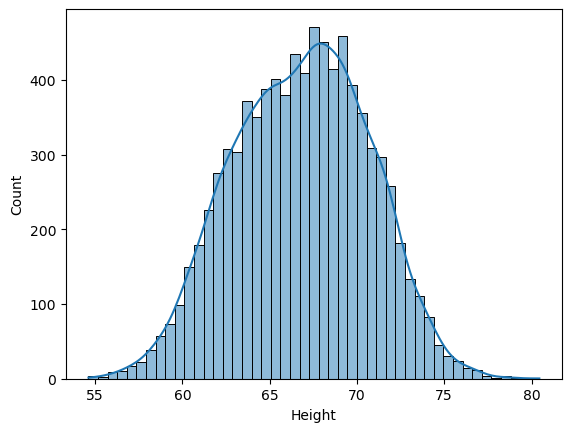

In [46]:
sns.histplot(df['Height'], kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

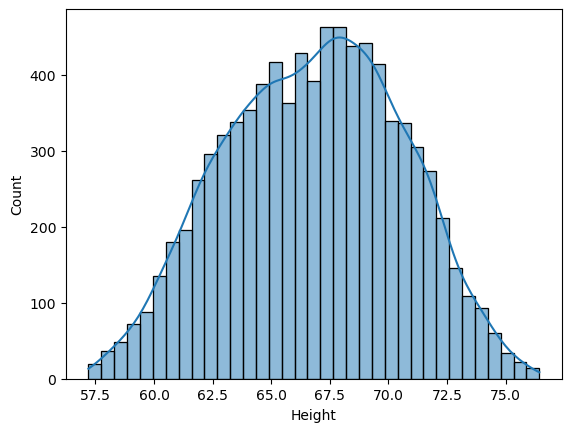

In [47]:
sns.histplot(after_remove_otliers['Height'], kde=True)

In [48]:
(8489/8555) *100

99.22852133255407

# STD

<AxesSubplot:xlabel='Height', ylabel='Count'>

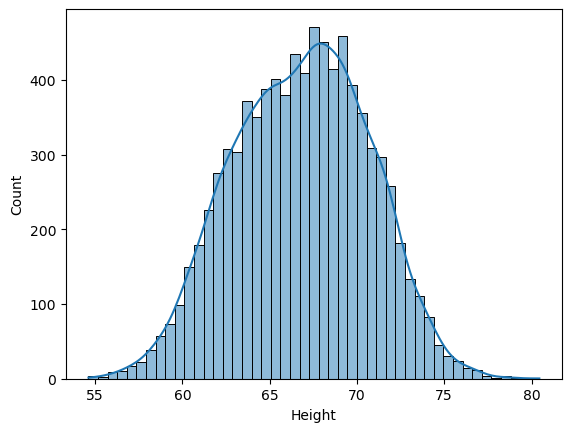

In [49]:
sns.histplot(df['Height'], kde=True)

In [50]:
mean = df2.Height.mean()

In [51]:
std = df2.Height.std()

In [52]:
sigma_3 = mean + (3*std)
sigma_3_neg = mean - (3*std)

In [53]:
sigma_3

78.36428842382108

In [54]:
sigma_3_neg

55.25556183435742

In [55]:
df2[df2['Height'] > sigma_3]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [56]:
df[(df['zscores'] >3)]

,Gender,Height,Weight,zscores,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746


In [57]:
df2[df2['Height'] < sigma_3_neg]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [58]:
df[(df['zscores'] >3) | (df['zscores']<-3)]

,Gender,Height,Weight,zscores,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [59]:
#who are the outliers?
df[(df['zscores'] >3) | (df['zscores']<-3)]

,Gender,Height,Weight,zscores,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [60]:
after_remove_df2 = df2[(df2['Height'] > sigma_3) | (df2['Height']<sigma_3_neg)] #only outliers
after_remove_df2

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [61]:
df2.shape

(8555, 3)

In [62]:
df2[(df2.Height<sigma_3_neg) | (df2.Height>sigma_3) ]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [63]:
df[(df['zscores'] >3) | (df['zscores'] < -3)]

,Gender,Height,Weight,zscores,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [64]:
after_remove_df2 = df2[(df2['Height'] < sigma_3) & (df2['Height']>sigma_3_neg)] # no outliers 
after_remove_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


# Boxplot

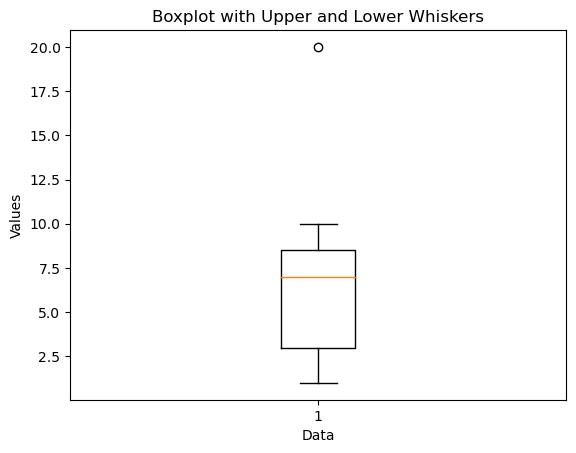

In [65]:
data = np.array([1,2,3,3,5,7,7,8,9,10,20])
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

outliers = (data < lower_whisker) | (data > upper_whisker)

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_title('Boxplot with Upper and Lower Whiskers')
ax.set_xlabel('Data')
ax.set_ylabel('Values')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1d0a3dae700>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0a3daeca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0a3dae400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0a3dbb280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0a3dbb550>],
 'means': []}

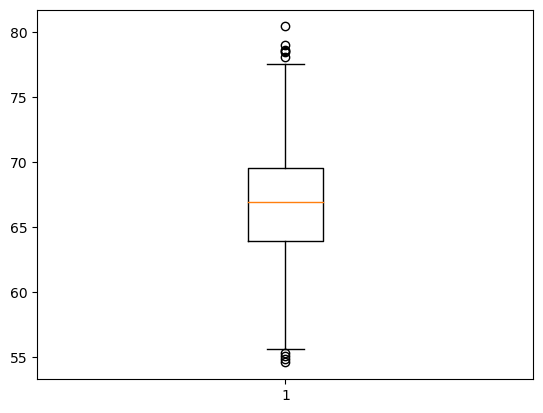

In [66]:
fig, ax = plt.subplots()
ax.boxplot(df['Height'])

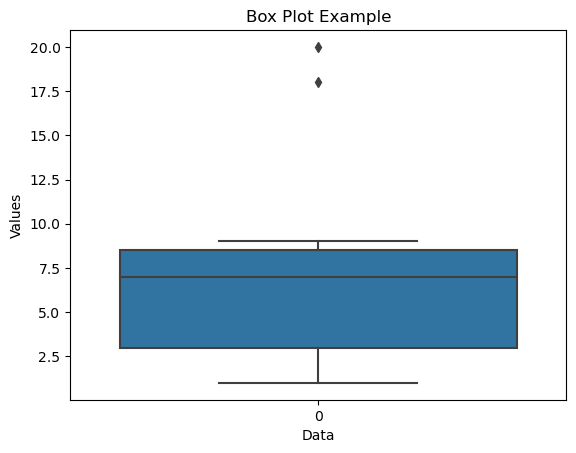

In [67]:
data = [1,2,3,3,5,7,7,8,9,18,20]

sns.boxplot(data=data)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

plt.show()


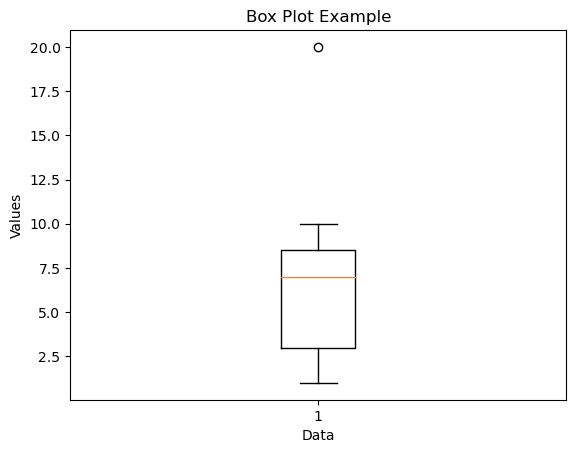

In [68]:
data = [1,2,3,3,5,7,7,8,9,10,20]

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot Example')
plt.show()
